<a href="https://colab.research.google.com/github/mca2309/OCR-using-OpenCV-and-Tensorflow-with-GUI/blob/R2/OCR_on_3D_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Downloading and extracting the CIFAKE dataset from kaggle
from google.colab import drive
drive.mount('/content/drive')

!pip install kaggle

import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

!kaggle datasets download -d daavoo/3d-mnist

import zipfile

file_path = '/content/3d-mnist.zip'

!mkdir 3d-mnist

with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/3d-mnist')

Mounted at /content/drive
 92% 140M/153M [00:02<00:00, 73.4MB/s]
100% 153M/153M [00:03<00:00, 51.9MB/s]


Epoch 1/10
313/313 [==============================] - 5s 8ms/step - loss: 2.2811 - accuracy: 0.1390 - val_loss: 2.1017 - val_accuracy: 0.2705
Epoch 2/10
313/313 [==============================] - 2s 6ms/step - loss: 1.9827 - accuracy: 0.2966 - val_loss: 1.7280 - val_accuracy: 0.4030
Epoch 3/10
313/313 [==============================] - 3s 8ms/step - loss: 1.7277 - accuracy: 0.4040 - val_loss: 1.5464 - val_accuracy: 0.4725
Epoch 4/10
313/313 [==============================] - 2s 7ms/step - loss: 1.5908 - accuracy: 0.4550 - val_loss: 1.4983 - val_accuracy: 0.4965
Epoch 5/10
313/313 [==============================] - 2s 7ms/step - loss: 1.4997 - accuracy: 0.4820 - val_loss: 1.3891 - val_accuracy: 0.5090
Epoch 6/10
313/313 [==============================] - 2s 6ms/step - loss: 1.4442 - accuracy: 0.5037 - val_loss: 1.3299 - val_accuracy: 0.5265
Epoch 7/10
313/313 [==============================] - 2s 6ms/step - loss: 1.3888 - accuracy: 0.5222 - val_loss: 1.3255 - val_accuracy: 0.5370
Epoch 

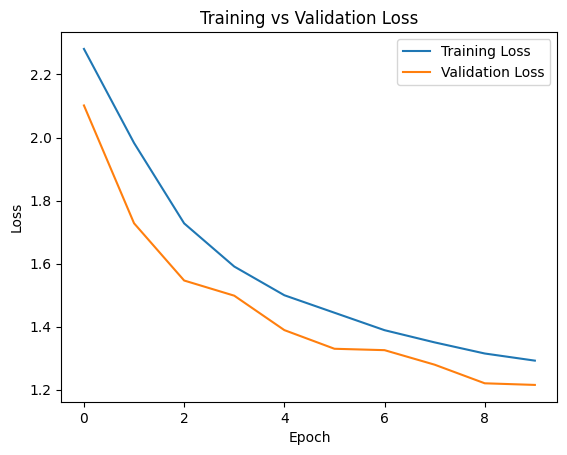

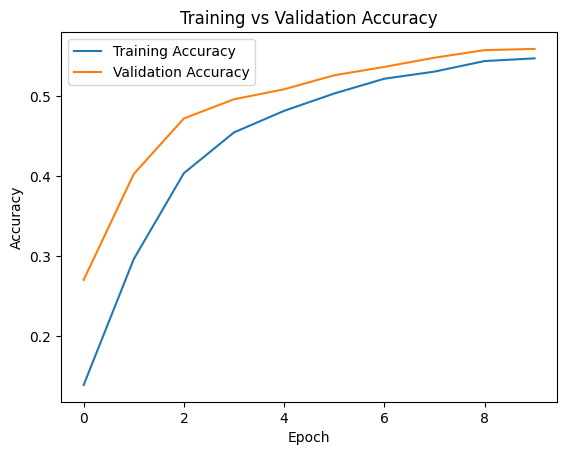

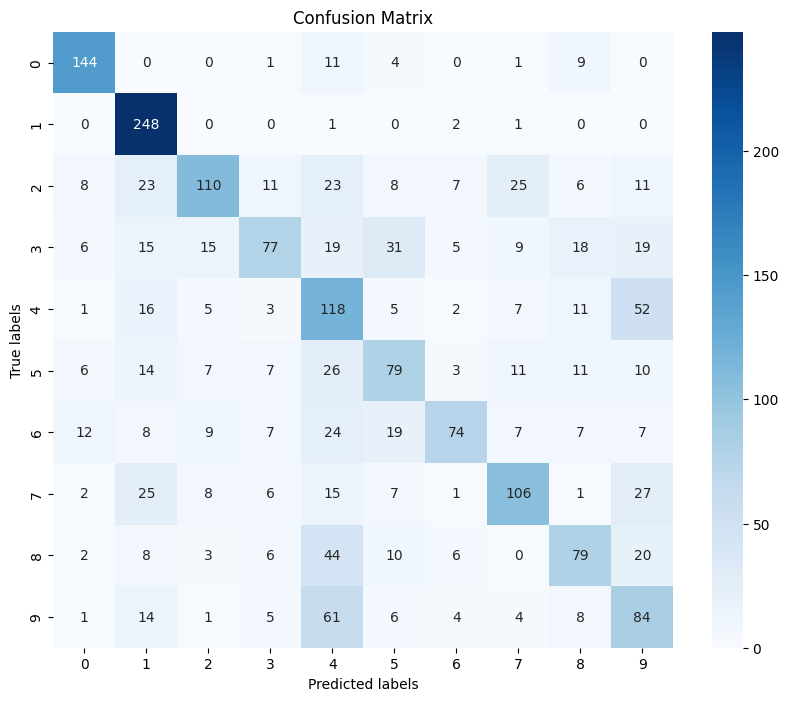

In [71]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import h5py

# Load the dataset
f = h5py.File("/content/3d-mnist/full_dataset_vectors.h5", "r")
trainX = f["X_train"][:]
trainY = f["y_train"][:]
testX = f["X_test"][:]
testY = f["y_test"][:]

# Reshape dataset to have a single channel and add a depth dimension
trainX = trainX.reshape((trainX.shape[0], 16, 16, 16, 1))
testX = testX.reshape((testX.shape[0], 16, 16, 16, 1))

# One-hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

# Scale pixels
trainX = trainX.astype('float32') / 255.0
testX = testX.astype('float32') / 255.0

# Create a CNN
model = Sequential()
model.add(Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(16, 16, 16, 1)))
model.add(MaxPooling3D((2, 2, 2)))
model.add(Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling3D((2, 2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile model
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY))

# Evaluate the model
loss, accuracy = model.evaluate(testX, testY)
print(f'Test accuracy: {accuracy}')

# Predict the test set
y_predicted = model.predict(testX)
y_predicted = np.argmax(y_predicted, axis=1)

# Print classification report
print(classification_report(np.argmax(testY, axis=1), y_predicted))

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

# Plot the training and testing accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

# Calculate the confusion matrix
conf_matrix = confusion_matrix(np.argmax(testY, axis=1), y_predicted)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
